In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

file_name='dataset_climatico.csv'
df = pd.read_csv('dataset_climatico.csv')
df.dropna(inplace=True)
df

,data_osservazione,temperatura_media,precipitazioni,umidita,velocita_vento,stazione_meteorologica
0,2022-01-01,3.345032,16.712921,66.028263,75.580829,Stazione Napoli
1,2022-01-02,34.640506,9.669180,52.891332,22.567745,Stazione Roma
2,2022-01-03,1.223902,17.623765,82.054851,59.792104,Stazione Milano
3,2022-01-04,-5.234223,18.328380,48.785933,2.510954,Stazione Milano
4,2022-01-05,32.792867,5.431022,64.595705,83.449843,Stazione Milano
...,...,...,...,...,...,...
995,2024-09-22,-5.320537,15.081807,83.219598,43.847675,Stazione Milano
996,2024-09-23,30.855431,14.381540,57.652988,27.694561,Stazione Napoli
997,2024-09-24,21.907286,11.191411,43.524909,95.281951,Stazione Roma
998,2024-09-25,17.687439,11.692892,49.286315,80.224083,Stazione Milano


In [2]:
normz = ['temperatura_media', 'precipitazioni', 'umidita', 'velocita_vento']
for colonna in normz:
    media = df[colonna].mean()
    std = df[colonna].std()
    df[colonna] = (df[colonna] - media) / std
df

,data_osservazione,temperatura_media,precipitazioni,umidita,velocita_vento,stazione_meteorologica
0,2022-01-01,-0.697485,1.120896,0.323947,0.984795,Stazione Napoli
1,2022-01-02,1.658157,-0.083385,-0.437707,-0.881970,Stazione Roma
2,2022-01-03,-0.857145,1.276624,1.253139,0.428822,Stazione Milano
3,2022-01-04,-1.343255,1.397094,-0.675730,-1.588236,Stazione Milano
4,2022-01-05,1.519083,-0.807990,0.240890,1.261889,Stazione Milano
...,...,...,...,...,...,...
995,2024-09-22,-1.349752,0.842022,1.320668,-0.132634,Stazione Milano
996,2024-09-23,1.373251,0.722296,-0.161635,-0.701438,Stazione Napoli
997,2024-09-24,0.699715,0.176874,-0.980754,1.678536,Stazione Roma
998,2024-09-25,0.382082,0.262613,-0.646719,1.148299,Stazione Milano


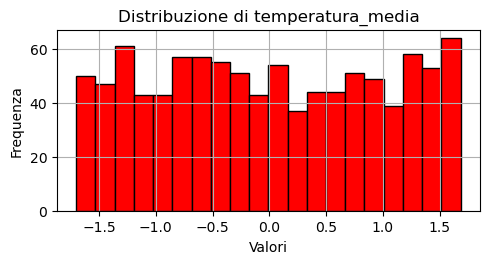

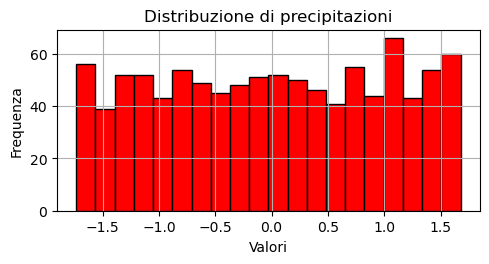

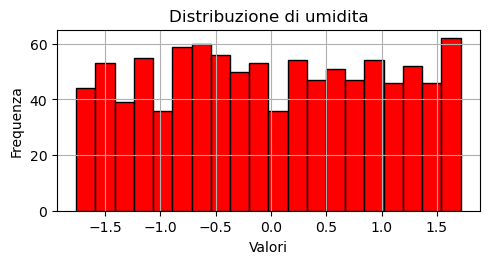

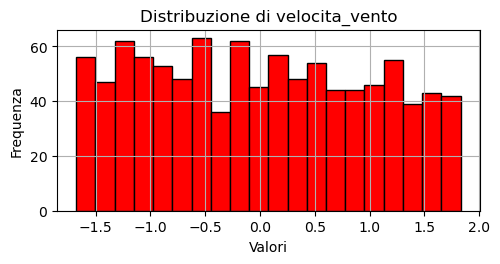

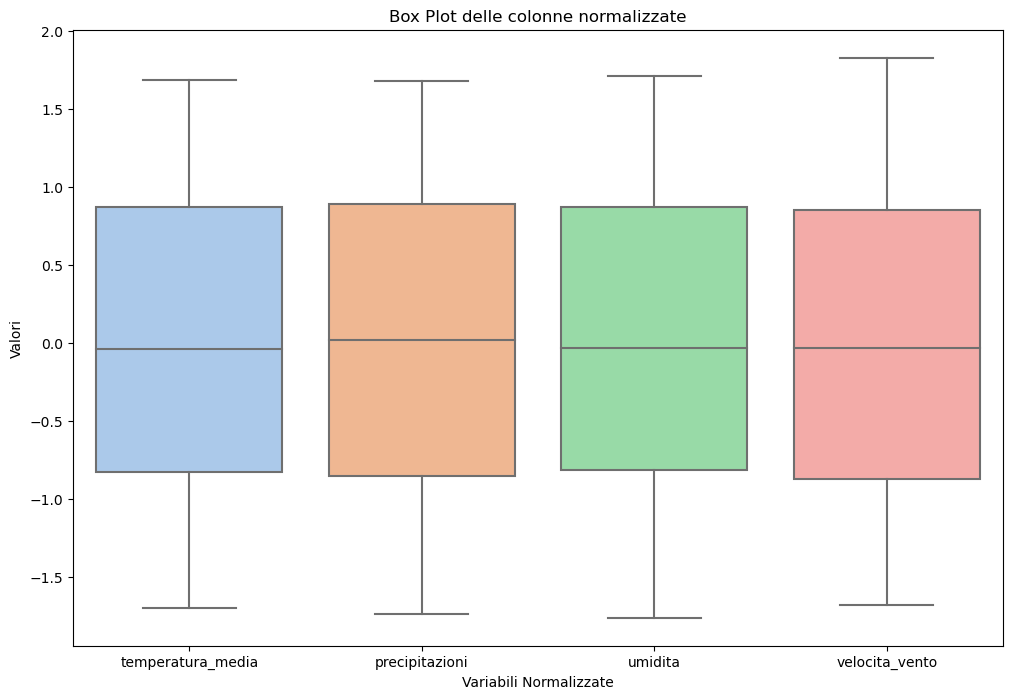

In [8]:
for i, colonna in enumerate(normz, start=1):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 2, i)
    plt.hist(df[colonna], bins=20, color='red', edgecolor='black')
    plt.title(f'Distribuzione di {colonna}')
    plt.xlabel('Valori')
    plt.ylabel('Frequenza')
    plt.grid(True)
    plt.show()
        
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[normz], palette='pastel')
plt.title('Box Plot delle colonne normalizzate')
plt.xlabel('Variabili Normalizzate')
plt.ylabel('Valori')
plt.show()

    


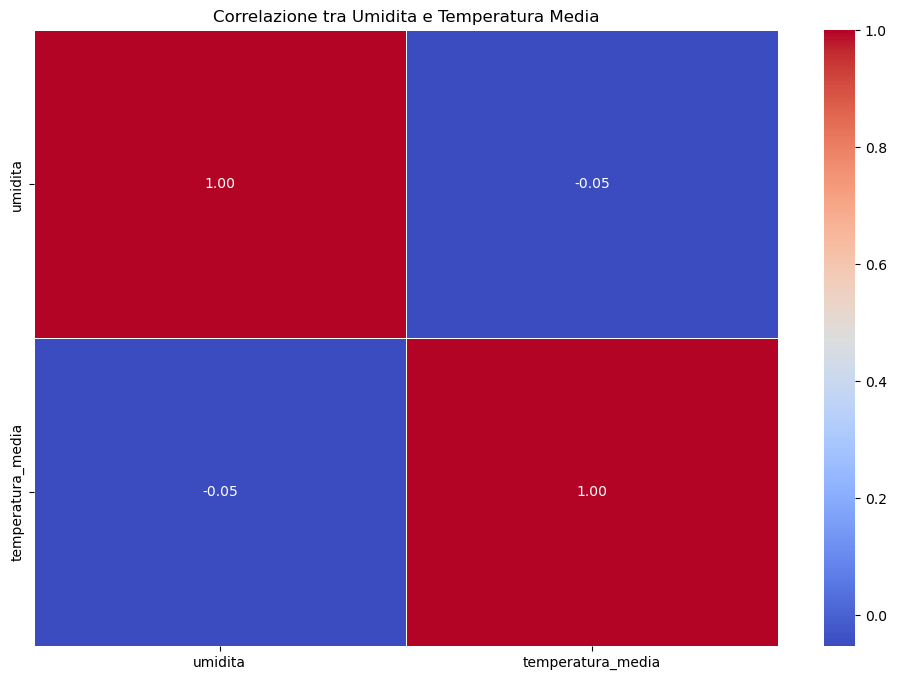

In [10]:
corr = df[['umidita','temperatura_media']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlazione tra Umidita e Temperatura Media')
plt.show()